USA House Prices Dataset
- This comprehensive dataset outlines an extensive list of factors and circumstances that impact the US housing market and detail how each sale and purchase in the US contributes to the overall market. The USA housing market being such a large sector of the market for investors and entrepreneurs makes understanding and analyzing trends essential. This dataset contains 14 descriptive features, both categorical and numerical, that can help us train a model and determine a prediction on housing prices based on housing features.

Description of Each Feature:
- Date
  - Sale date of the property. Critical in understanding the climate of the housing market at the time of sale for the specific property. Can help us isolate trends and changes in the market.
- Price
  - Sale price of the property in USD. Sale price is the target variable that our models are aiming to predict based on the other housing features.
- Bedrooms
  - Numerical count of bedrooms in the property. This feature is critical in predicting property value because bedrooms tend to be directly proportional with value. The more bedrooms, the more expensive the property.
- Bathrooms
  - Numerical count of bathrooms in the property. Like the bedroom feature, this is important in value predictions because typically the more bathrooms, the more expensive the property.
- Sqft Living
  - Size of the living area measured in square feet. This is one of the most important features for model training because square footage is one of the biggest factors in concluding the price of a property.
- Sqft Lot
  - Size of the lot measured in square feet. The lot of a property is a highly sought after factor when buyers look into a property so this statistic will help will determining price of a property.
- Floors
  - Numerical count of floors in the property. Generally speaking, the more floors a property has, the more square footage you have and this aids in price determination.
- Waterfront
  - Binary feature that contains 1 if the property has a waterfront view and 0 if the property has no waterfront view. Depending on the area and state the property resides in, a waterfront view is essential for buyers so this is a large determinant in property value.
- View
  - A numerical feature that ranks the view from the property from 0 to 4. The higher the index of the property's view, the more desirable it is for buyers.
- Condition
  - A numerical feature that ranks the condition of the property from 1 to 5. Needless to say, the higher the index of the condition, the more desirable the property is.
- Sqft Above
  - Size of the property above the basement measured in square feet. This feature aids in isolating the value of the property from above ground as opposed to combining it with the below ground value.
- Sqft Basement
  - Size of the basement measured in square feet. Similar to the last feature, buyers often value a larger basement and this is critical in understanding the full context of a property.
- Yr Built
  - Year the property was built. Year built provides context to the property; where an older property might contain some historical value and a newer property would boast modern features and ammenities you won't find in an older property.
- Yr Renovated
  - Year the property was last renovated. Recent renovations can increase a property's appeal and value as modern and more advanced features can be implemented.
- Street
  - The street address of the property. This feature aids in determining the location of the property which has a big impact on the features of the property because different areas have a different housing market than others.
- City
  - The city the property is located. Like the last feature, this is important for determining location-specific trends.
- Statezip
  - The state and zip code of the property. Works hand in hand with the street and city features to determine location-specific trends.
- Country
  - The country where the property is located. Most of the properties in this dataset are located in USA but this is a necessary feature to complete the other location-based features.
 
Features For Model Training
- Sqft Living
- House Age
- Renovated (Binary)
- Sqft Per Room (Total Square Feet / Total Rooms)
- Basement Ratio (Sqft of Basement / Sqft of Living Space)
- Total Rooms (Bedrooms + Bathrooms)
- Above Ground Ratio (Sqft Above Ground / Sqft of Living Space)
- Price
- Sqft Lot
- Floors
- Waterfront
- View
- Condition

All of the above features are critical in understanding the features of the property and how they'll perform in the housing market relative to the sale date of the property. Most of these features are directly proportional to total property value and will be useful in training our models to predict the sale price of properties based on their features. Some features have been optimized, consolidated, or encoded to provide a bit more conclusive or useful information for predictions by our model.

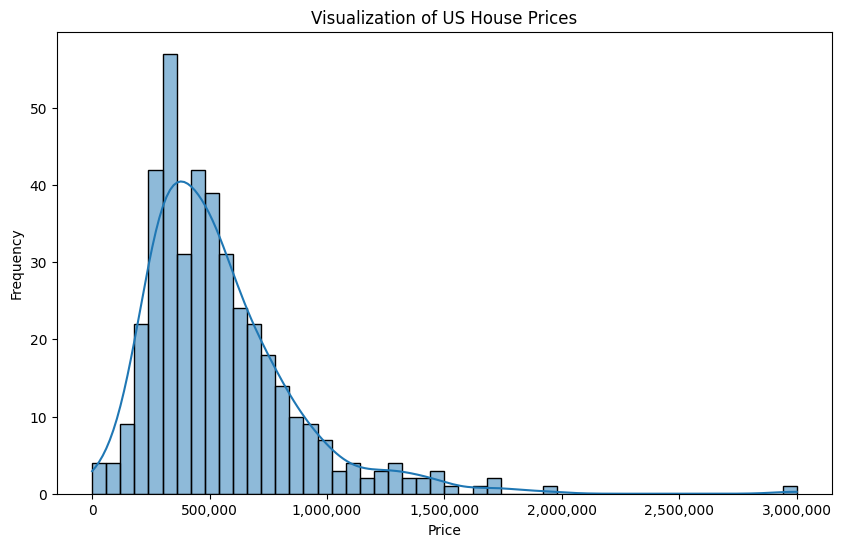

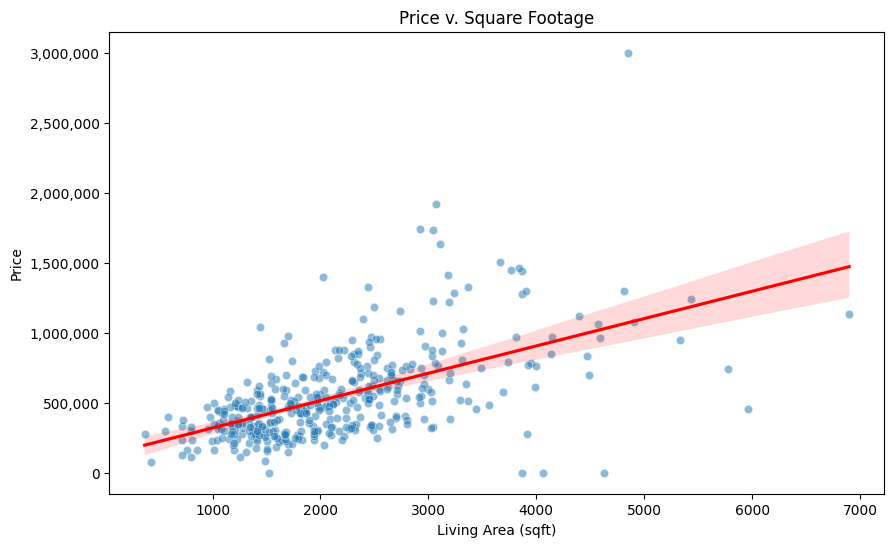

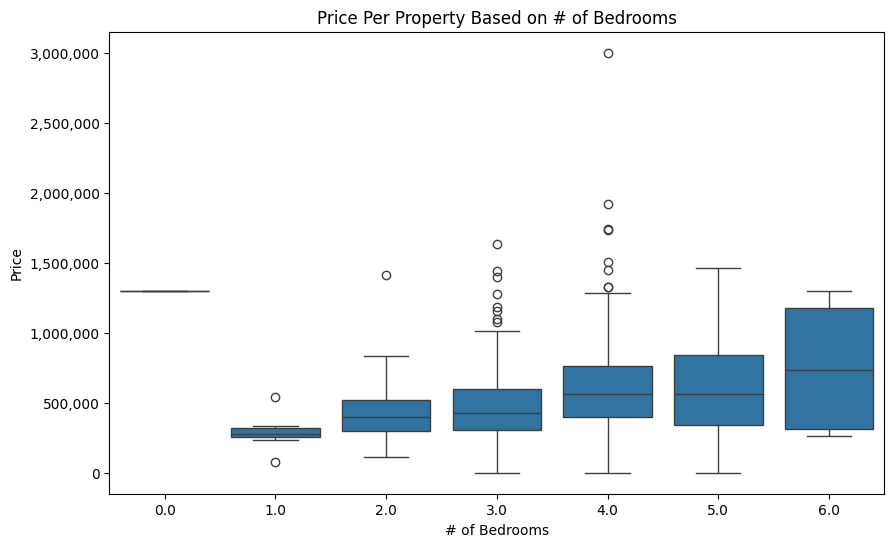

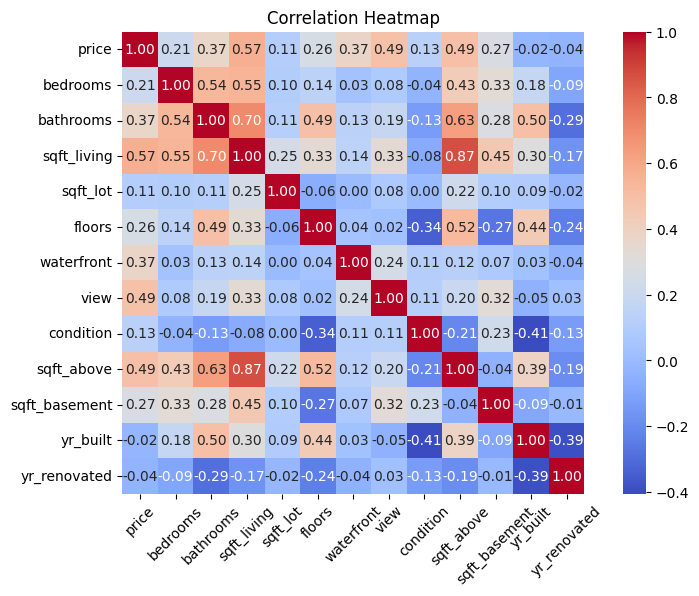

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import pandas as pd

df_genai = pd.read_csv('USA Housing Dataset.csv')
df_sample = df_genai.sample(frac=0.1, random_state=42)

#1) Histogram with KDE
plt.figure(figsize=(10,6))
sns.histplot(df_sample['price'], bins=50, kde=True)
plt.title('Visualization of US House Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.gca().xaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x):,}'))
plt.show()

#2) Scatter Plot with Regression Line
plt.figure(figsize=(10,6))
sns.scatterplot(data=df_sample, x='sqft_living', y='price', alpha=0.5)
sns.regplot(data=df_sample, x='sqft_living', y='price', scatter=False, color='red')
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x):,}'))
plt.title('Price v. Square Footage')
plt.xlabel('Living Area (sqft)')
plt.ylabel('Price')
plt.show()

#3) Box Plot
plt.figure(figsize=(10,6))
sns.boxplot(data=df_sample[df_sample['bedrooms'] <= 6], x='bedrooms', y='price')
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x):,}'))
plt.title('Price Per Property Based on # of Bedrooms')
plt.xlabel('# of Bedrooms')
plt.ylabel('Price')
plt.show()

#4) Heatmap
plt.figure(figsize=(10,6))
correlation = df_sample.corr(numeric_only=True)
sns.heatmap(correlation, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Correlation Heatmap')
plt.xticks(rotation=45)
plt.show()

In [2]:
import pandas as pd

df = pd.read_csv('USA Housing Dataset.csv')

def pre_process(data):

    # NaN check
    if data.isnull().values.any():
        print("There are null values.")
    else:
        print("No missing values")

    # Houses with a price of 0 are most likely bad data. Removed for sake of keeping things predictable
    zero_price_count = len(data[data['price'] == 0])
    print(f"Houses with zero price count: {zero_price_count}")
    data = data[data['price'] > 0].copy()

    """
    Feature engineering
    """
    # Check city count
    print(f"There are {len(data['city'].value_counts())} unique cities.")

    # Age of house is more interpretable than year built
    data['house_age'] = 2014 - data['yr_built']
    
    # Binary flag for renovation is more useful than year
    data['renovated'] = (data['yr_renovated'] > 0).astype(int)
    
    # Square footage per room
    total_rooms_temp = data['bedrooms'] + data['bathrooms']
    data['sqft_per_room'] = data['sqft_living'] / total_rooms_temp.replace(0, 1)
    
    # Basement ratio - what proportion of living space is basement
    data['basement_ratio'] = data['sqft_basement'] / data['sqft_living'].replace(0, 1)
    
    # Total rooms
    data['total_rooms'] = data['bedrooms'] + data['bathrooms']
    
    # Above ground ratio
    data['above_ground_ratio'] = data['sqft_above'] / data['sqft_living'].replace(0, 1)
    
    # Get city counts
    city_counts = data['city'].value_counts()
    
    # Keep top 10 cities, group rest as 'Other'
    top_cities = city_counts.head(10).index.tolist()
    data['city_grouped'] = data['city'].apply(lambda x: x if x in top_cities else 'Other')
        
    # Encode the grouped cities
    data = pd.get_dummies(data, columns=['city_grouped'], prefix='city')
    
    # Define columns to check for outliers
    outlier_columns = ['price', 'sqft_living', 'sqft_lot', 'bedrooms', 'bathrooms']
    
    for col in outlier_columns:
        if col in data.columns:
            Q1 = data[col].quantile(0.25)
            Q3 = data[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
                        
            # Remove outliers
            data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]
        
    """
    Dropped these columns because of redundancy/feature space consideration. The timeframe is short, only 2 months, and
    the market is reflected in the data anyway. Streets are unique values that blow up the feature space when encoded, and
    statezip is redundant with city. Countries contributes nothing because every house is in the USA. Also dropping yr built 
    and yr renovated since we extracted the useful information into house age and renovated features. To prevent cities from blowing
    up the feature space, I encoded them into the top 10 cities and then an "other" group.
    """
    columns_to_drop = ['date', 'street', 'statezip', 'country', 'city', 'yr_built', 'yr_renovated']
    data = data.drop(columns=columns_to_drop)
    
    return data

results = pre_process(df)

No missing values
Houses with zero price count: 49
There are 43 unique cities.


In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from preprocessing import results
from sklearn.ensemble import GradientBoostingRegressor


# Prepare features and target
X = results.drop('price', axis=1)
y = results['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Model
rf_model = RandomForestRegressor(
    n_estimators=500,
    max_depth=12,
    min_samples_split=10,
    min_samples_leaf=10,
    max_features='sqrt',
    random_state=42
)

# Cross-validation randmo forest
cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='r2')
print(f"Cross-validation R^2 scores: {cv_scores}")
print(f"Mean CV R^2: {cv_scores.mean():.4f}")

rf_model.fit(X_train, y_train)

# Make predictions
y_pred_train = rf_model.predict(X_train)
y_pred_test = rf_model.predict(X_test)

# Calculate metrics
train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)
test_mae = mean_absolute_error(y_test, y_pred_test)

print(f"\nRF Training RMSE: ${train_rmse:.2f}")
print(f"Test RMSE: ${test_rmse:.2f}")
print(f"Training R^2: {train_r2:.4f}")
print(f"Test R^2: {test_r2:.4f}")
print(f"Test MAE: ${test_mae:.2f}")

# Feature importance
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

print("\nRF Feature Importance (Top 10)")
print(feature_importance.head(10).to_string(index=False))

# Overfitting check
overfit_ratio = train_r2 / test_r2 if test_r2 > 0 else float('inf')
rmse_ratio = test_rmse / train_rmse if train_rmse > 0 else float('inf')

print(f"\nRF Train R^2 / Test R^2 ratio: {overfit_ratio:.4f}")
print(f"RF Test RMSE / Train RMSE ratio: {rmse_ratio:.4f}")
print(f"RF CV Mean R^2: {cv_scores.mean():.4f}")

if overfit_ratio > 1.15:
    print("\nRF Model is probably overfitting")
else:
    print("\nRF Model generalization looks fine")

# Gradient Boosting Model
gb_model = GradientBoostingRegressor(
    n_estimators=1000, 
    max_depth=3, 
    learning_rate=0.01, 
    random_state=42
)

# Cross-validation for GB
gb_cv_scores = cross_val_score(gb_model, X_train, y_train, cv=5, scoring='r2')
print(f"\nGradient Boosting Cross-validation R^2 scores: {gb_cv_scores}")
print(f"GB Mean CV R^2: {gb_cv_scores.mean():.4f}")

gb_model.fit(X_train, y_train)

# Make predictions for GB
gb_pred_train = gb_model.predict(X_train)
gb_pred_test = gb_model.predict(X_test)

# Calculate metrics for GB
gb_train_rmse = np.sqrt(mean_squared_error(y_train, gb_pred_train))
gb_test_rmse = np.sqrt(mean_squared_error(y_test, gb_pred_test))
gb_train_r2 = r2_score(y_train, gb_pred_train)
gb_test_r2 = r2_score(y_test, gb_pred_test)
gb_test_mae = mean_absolute_error(y_test, gb_pred_test)

print(f"\nGradient Boosting Results:")
print(f"Training RMSE: ${gb_train_rmse:.2f}")
print(f"Test RMSE: ${gb_test_rmse:.2f}")
print(f"Training R^2: {gb_train_r2:.4f}")
print(f"Test R^2: {gb_test_r2:.4f}")
print(f"Test MAE: ${gb_test_mae:.2f}")

# Feature importance for GB
gb_feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': gb_model.feature_importances_
}).sort_values('importance', ascending=False)

print("\nGB Feature Importance (Top 10)")
print(gb_feature_importance.head(10).to_string(index=False))

# Overfitting check for GB
gb_overfit_ratio = gb_train_r2 / gb_test_r2 if gb_test_r2 > 0 else float('inf')
gb_rmse_ratio = gb_test_rmse / gb_train_rmse if gb_train_rmse > 0 else float('inf')

print(f"\nGB Train R^2 / Test R^2 ratio: {gb_overfit_ratio:.4f}")
print(f"GB Test RMSE / Train RMSE ratio: {gb_rmse_ratio:.4f}")
print(f"GB CV Mean R^2: {gb_cv_scores.mean():.4f}")

if gb_overfit_ratio > 1.15:
    print("\nGB Model is probably overfitting")
else:
    print("\nGB Model generalization looks fine")

No missing values
Houses with zero price count: 49
There are 43 unique cities.
Cross-validation R^2 scores: [0.57643476 0.55931019 0.61718617 0.548318   0.57874131]
Mean CV R^2: 0.5760

RF Training RMSE: $117676.76
Test RMSE: $123216.98
Training R^2: 0.6788
Test R^2: 0.6202
Test MAE: $93572.37

RF Feature Importance (Top 10)
      feature  importance
  sqft_living    0.221829
sqft_per_room    0.146468
   sqft_above    0.119671
    bathrooms    0.064058
    house_age    0.057863
  total_rooms    0.049513
 city_Seattle    0.045224
     sqft_lot    0.040221
city_Bellevue    0.034003
sqft_basement    0.026867

RF Train R^2 / Test R^2 ratio: 1.0944
RF Test RMSE / Train RMSE ratio: 1.0471
RF CV Mean R^2: 0.5760

RF Model generalization looks fine

Gradient Boosting Cross-validation R^2 scores: [0.6324367  0.63507744 0.69570541 0.60673924 0.66128666]
GB Mean CV R^2: 0.6462

Gradient Boosting Results:
Training RMSE: $109888.81
Test RMSE: $111194.27
Training R^2: 0.7199
Test R^2: 0.6907
Test MA